In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-12-23 11:34:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.128, 173.194.215.128, 108.177.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   208MB/s    in 0.5s    

2021-12-23 11:34:48 (208 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# inspect data

In [3]:
 import pathlib
 import numpy as np
 data_dir = pathlib.Path("pizza_steak")
 class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
 print(class_names)

['test' 'train']


In [4]:
import matplotlib.pyplot as  plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir,target_class):
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  # read image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape:{img.shape}")
  return img

Image shape:(512, 512, 3)


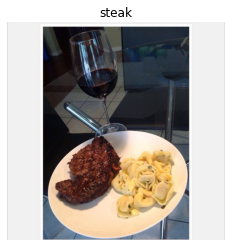

In [5]:
img = view_random_image("pizza_steak/train","steak")

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#import data from directories and turn it into batches

train_dir = "/content/pizza_steak/train"
valid_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                              batch_size=32,
                              target_size=(224,224),
                              class_mode="binary",
                              seed=42)
valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                  batch_size=32,
                                  target_size=(224,224),
                                  class_mode="binary",
                                  seed=42)
# build CNN

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid") 

])


#compile our CNN

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 21s 237ms/step - loss: 0.5354 - accuracy: 0.7200 - val_loss: 0.4648 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.4276 - accuracy: 0.8060 - val_loss: 0.3692 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3989 - accuracy: 0.8313 - val_loss: 0.3149 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.3671 - accuracy: 0.8373 - val_loss: 0.2945 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3340 - accuracy: 0.8580 - val_loss: 0.3207 - val_accuracy: 0.8640


In [7]:
# jhjjh

In [8]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(224,224,3)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_2.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=valid_data,
          validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 1.4745 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [9]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(224,224,3)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data)
            )

Epoch 1/5
47/47 [==============================] - 10s 208ms/step - loss: 2.1083 - accuracy: 0.6533 - val_loss: 0.5638 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.9851 - accuracy: 0.6807 - val_loss: 0.6546 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.5900 - accuracy: 0.7573 - val_loss: 0.4989 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6469 - accuracy: 0.7293 - val_loss: 0.6210 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.5396 - accuracy: 0.7680 - val_loss: 0.4471 - val_accuracy: 0.7860


In [10]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Visualize data

Image shape:(384, 512, 3)
Image shape:(512, 512, 3)


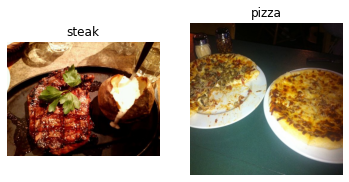

In [12]:
plt.figure()
plt.subplot(1,2,1)
img = view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
img = view_random_image("pizza_steak/train","pizza")

In [13]:
!nvidia-smi

Thu Dec 23 11:37:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    36W / 250W |   2113MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Data preprocessing

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir ="/content/pizza_steak/test"

train_data =train_datagen.flow_from_directory(train_dir,
                               target_size=(224,224),
                               batch_size=32,
                               class_mode="binary")
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
images,labels = next(train_data)

In [17]:
len(images),len(labels)

(32, 32)

In [18]:
# images[0],images[0].shape

## Import necessary packages

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Conv2D, Activation,Dense, MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [20]:
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  Flatten(),
  Dense(1,activation="sigmoid")
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])
model_4.fit(train_data,
            steps_per_epoch=len(train_data),
            epochs=10,
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 11s 209ms/step - loss: 1.5909 - accuracy: 0.6500 - val_loss: 0.4552 - val_accuracy: 0.8140
Epoch 2/10
47/47 [==============================] - 10s 204ms/step - loss: 0.4649 - accuracy: 0.7987 - val_loss: 0.4106 - val_accuracy: 0.8260
Epoch 3/10
47/47 [==============================] - 10s 204ms/step - loss: 0.3800 - accuracy: 0.8367 - val_loss: 0.4398 - val_accuracy: 0.7820
Epoch 4/10
47/47 [==============================] - 10s 202ms/step - loss: 0.2399 - accuracy: 0.9173 - val_loss: 0.4119 - val_accuracy: 0.8180
Epoch 5/10
47/47 [==============================] - 10s 203ms/step - loss: 0.0938 - accuracy: 0.9733 - val_loss: 0.5680 - val_accuracy: 0.7820
Epoch 6/10
47/47 [==============================] - 10s 205ms/step - loss: 0.0398 - accuracy: 0.9927 - val_loss: 1.0018 - val_accuracy: 0.7240
Epoch 7/10
47/47 [==============================] - 10s 203ms/step - loss: 0.0243 - accuracy: 0.9933 - val_loss: 0.6820 - val_accuracy: 0.7820

In [21]:
model_5 = Sequential([
   Input(shape=(224,224,3)),
   Conv2D(10,3,activation="relu"),
   MaxPool2D(2),
   Conv2D(10,3,activation="relu"),
   MaxPool2D(2),
   Conv2D(10,3,activation="relu"),
   MaxPool2D(2),
   Flatten(),
   Dense(1,activation="sigmoid")
])

In [22]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [23]:
history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 10s 207ms/step - loss: 0.6566 - accuracy: 0.6260 - val_loss: 0.5058 - val_accuracy: 0.8160
Epoch 2/10
47/47 [==============================] - 9s 202ms/step - loss: 0.4896 - accuracy: 0.7787 - val_loss: 0.4149 - val_accuracy: 0.8240
Epoch 3/10
47/47 [==============================] - 10s 203ms/step - loss: 0.4360 - accuracy: 0.8027 - val_loss: 0.3794 - val_accuracy: 0.8520
Epoch 4/10
47/47 [==============================] - 10s 204ms/step - loss: 0.4284 - accuracy: 0.8100 - val_loss: 0.3914 - val_accuracy: 0.8340
Epoch 5/10
47/47 [==============================] - 10s 220ms/step - loss: 0.3975 - accuracy: 0.8233 - val_loss: 0.3581 - val_accuracy: 0.8320
Epoch 6/10
47/47 [==============================] - 10s 205ms/step - loss: 0.3641 - accuracy: 0.8393 - val_loss: 0.3304 - val_accuracy: 0.8580
Epoch 7/10
47/47 [==============================] - 10s 204ms/step - loss: 0.3332 - accuracy: 0.8620 - val_loss: 0.3220 - val_accuracy: 0.8540


In [24]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

## Opening our bag of tricks and finding data augmentation

In [27]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=.2,
                                             zoom_range=.2,
                                             width_shift_range=.2,
                                             height_shift_range=.2,
                                             horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
print("Augmented Data:")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                batch_size=32,
                                                                target_size=(224,224),
                                                                class_mode="binary",
                                                                shuffle=False)
print("Non-augmented train data:")

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               shuffle=False)
print("Test Data:")

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")

Augmented Data:
Found 1500 images belonging to 2 classes.
Non-augmented train data:
Found 1500 images belonging to 2 classes.
Test Data:
Found 500 images belonging to 2 classes.


In [34]:
#get sample augmented data

images,labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 2


(-0.5, 223.5, 223.5, -0.5)

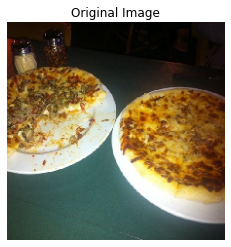

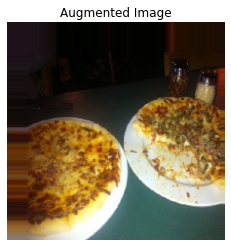

In [47]:
import random

random_number = random.randint(0,31)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis("off")
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [50]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                batch_size=32,
                                                                target_size=(224,224),
                                                                class_mode="binary")

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [52]:
model_6 = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(), 
    Dense(1,activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])
model_6.fit(train_data_augmented,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 27s 556ms/step - loss: 0.6449 - accuracy: 0.6087 - val_loss: 0.5008 - val_accuracy: 0.7800
Epoch 2/10
47/47 [==============================] - 23s 487ms/step - loss: 0.5423 - accuracy: 0.7167 - val_loss: 0.3973 - val_accuracy: 0.8460
Epoch 3/10
47/47 [==============================] - 23s 495ms/step - loss: 0.4762 - accuracy: 0.7907 - val_loss: 0.3242 - val_accuracy: 0.8740
Epoch 4/10
47/47 [==============================] - 23s 483ms/step - loss: 0.4578 - accuracy: 0.7840 - val_loss: 0.3743 - val_accuracy: 0.8280
Epoch 5/10
47/47 [==============================] - 23s 484ms/step - loss: 0.4433 - accuracy: 0.7967 - val_loss: 0.3346 - val_accuracy: 0.8580
Epoch 6/10
47/47 [==============================] - 23s 496ms/step - loss: 0.4627 - accuracy: 0.7820 - val_loss: 0.3443 - val_accuracy: 0.8700
Epoch 7/10
47/47 [==============================] - 23s 495ms/step - loss: 0.4419 - accuracy: 0.7913 - val_loss: 0.4920 - val_accuracy: 0.7740

## Mult-class classification
1. Become on with the data
2. preprocess data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters

In [54]:
 import zipfile
 !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
 zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
 zip_ref.extractall()
 zip_ref.close()

--2021-12-23 13:39:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 74.125.26.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   189MB/s    in 2.6s    

2021-12-23 13:39:33 (189 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [55]:
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [57]:
import os
import numpy as np

In [63]:
class_names = np.array(sorted(os.listdir(train_dir)))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape:(512, 512, 3)


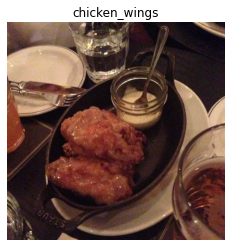

In [106]:
import random

img = view_random_image(train_dir,random.choice(class_names))

In [107]:
 # preprocess Data

In [108]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator

In [110]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a baseline model

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPool2D, Flatten, Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model_8 = Sequential([
   Input(shape=(224,224,3)),
   Conv2D(10,3),
   Activation(activation="relu"),
   Conv2D(10,3,activation="relu"),
   MaxPool2D(),
   Conv2D(10,3),
   Conv2D(10,3),
   MaxPool2D(),
   Flatten(),
   Dense(10,activation="softmax")
])


## compile model

model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_8.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 47s 197ms/step - loss: 2.1024 - accuracy: 0.2489 - val_loss: 1.9345 - val_accuracy: 0.3240
Epoch 2/10
235/235 [==============================] - 47s 200ms/step - loss: 1.8079 - accuracy: 0.3881 - val_loss: 1.8704 - val_accuracy: 0.3580
Epoch 3/10
235/235 [==============================] - 46s 194ms/step - loss: 1.4640 - accuracy: 0.5144 - val_loss: 2.0673 - val_accuracy: 0.3068
Epoch 4/10
235/235 [==============================] - 47s 199ms/step - loss: 0.7601 - accuracy: 0.7623 - val_loss: 2.5275 - val_accuracy: 0.3048
Epoch 5/10
235/235 [==============================] - 46s 195ms/step - loss: 0.1943 - accuracy: 0.9481 - val_loss: 3.7994 - val_accuracy: 0.2744
Epoch 6/10
235/235 [==============================] - 44s 189ms/step - loss: 0.0432 - accuracy: 0.9931 - val_loss: 4.5087 - val_accuracy: 0.2788
Epoch 7/10
235/235 [==============================] - 43s 182ms/step - loss: 0.0069 - accuracy: 0.9997 - val_loss: 5.1348 - val_ac

### Create a simpler model

In [121]:
model_9 = Sequential([
  Input(shape=(224,224,3)),
  Conv2D(10,3),
  Activation("relu"),
  MaxPool2D(),
  Conv2D(10,3),
  Activation("relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10),
  Activation("softmax")
])


model_9.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

model_9.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 44s 184ms/step - loss: 2.1358 - accuracy: 0.2244 - val_loss: 2.0316 - val_accuracy: 0.2600
Epoch 2/10
235/235 [==============================] - 43s 181ms/step - loss: 1.8639 - accuracy: 0.3585 - val_loss: 1.9524 - val_accuracy: 0.3180
Epoch 3/10
235/235 [==============================] - 43s 182ms/step - loss: 1.5608 - accuracy: 0.4832 - val_loss: 1.8843 - val_accuracy: 0.3560
Epoch 4/10
235/235 [==============================] - 43s 183ms/step - loss: 1.0887 - accuracy: 0.6543 - val_loss: 2.2281 - val_accuracy: 0.3128
Epoch 5/10
235/235 [==============================] - 43s 182ms/step - loss: 0.6223 - accuracy: 0.8131 - val_loss: 2.4429 - val_accuracy: 0.3208
Epoch 6/10
235/235 [==============================] - 44s 187ms/step - loss: 0.2938 - accuracy: 0.9268 - val_loss: 3.1505 - val_accuracy: 0.3036
Epoch 7/10
235/235 [==============================] - 43s 184ms/step - loss: 0.1285 - accuracy: 0.9763 - val_loss: 3.4926 - val_ac

## Try data augmentation

In [126]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=.2,
                                             width_shift_range=.2,
                                             height_shift_range=.2,
                                             zoom_range=.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [127]:
model_10 = tf.keras.models.clone_model(model_8)

In [128]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_4 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_30 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_32 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [129]:
model_10.compile(loss=CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [130]:
model_10.fit(train_data_augmented,
             epochs=10,
             steps_per_epoch=len(train_data_augmented),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 117s 495ms/step - loss: 2.1624 - accuracy: 0.2249 - val_loss: 1.9721 - val_accuracy: 0.3044
Epoch 2/10
235/235 [==============================] - 114s 485ms/step - loss: 2.0483 - accuracy: 0.2763 - val_loss: 1.8867 - val_accuracy: 0.3460
Epoch 3/10
235/235 [==============================] - 114s 487ms/step - loss: 2.0066 - accuracy: 0.2980 - val_loss: 1.8507 - val_accuracy: 0.3568
Epoch 4/10
235/235 [==============================] - 117s 496ms/step - loss: 1.9672 - accuracy: 0.3159 - val_loss: 1.8811 - val_accuracy: 0.3440
Epoch 5/10
235/235 [==============================] - 118s 500ms/step - loss: 1.9578 - accuracy: 0.3168 - val_loss: 1.7815 - val_accuracy: 0.3960
Epoch 6/10
235/235 [==============================] - 117s 498ms/step - loss: 1.9297 - accuracy: 0.3309 - val_loss: 1.8340 - val_accuracy: 0.3800
Epoch 7/10
235/235 [==============================] - 115s 491ms/step - loss: 1.9128 - accuracy: 0.3355 - val_loss: 1.7295 -

## Save and load a model

In [131]:
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [132]:
loaded_mdoel_10 = tf.keras.models.load_model("saved_trained_model_10")

In [133]:
loaded_mdoel_10.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 1.7429 - accuracy: 0.4128


[1.7429447174072266, 0.41280001401901245]